# MA3832 Week 1




You can create a virtual environment to avoid the conflict different version of dependencies. Details are here https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/


Download all Python libraries required

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Load dataset from https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv

In [3]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url,sep=",")


### Data Type

Comment?

In [4]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data Exploration  
- Plot histogram of independent variables
- Plot scatter plot reflecting location of houses versus population and the sales prices. Any comment?

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

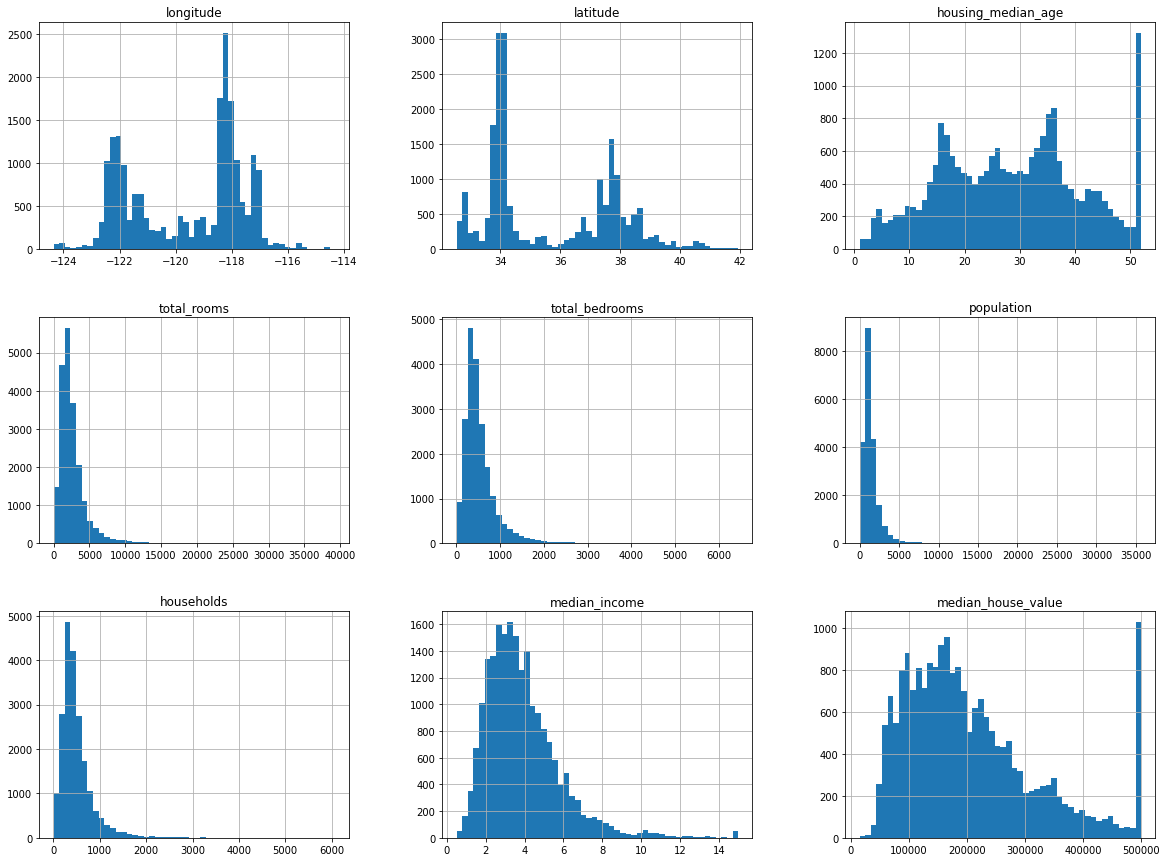

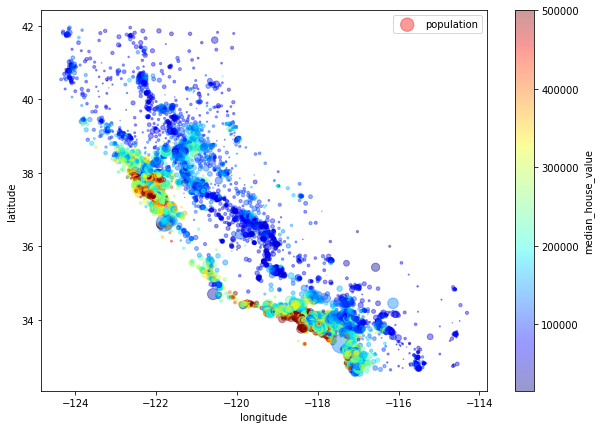

In [5]:
data.hist(bins=50, figsize=(20,15))

# plt.hist(data['total_bedrooms], bins=10)

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

### Correlation coefficients
Correlation coefficients of the variables to median_house_value. Comment on this

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

(0.0, 16.0, 0.0, 550000.0)

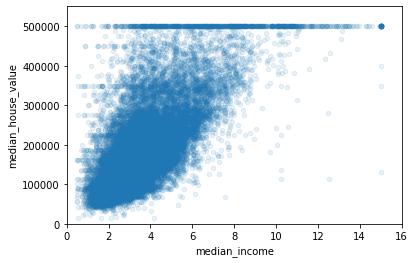

In [6]:
corr_matrix = data.corr()
print(corr_matrix)

corr_matrix["median_house_value"].sort_values(ascending=False)

data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

### Dealing with missing value

In [7]:
median_bedrooms = data["total_bedrooms"].median()
print(median_bedrooms)

data['total_bedrooms'].fillna(median_bedrooms, inplace=True)

data.info()


435.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Creating new variables  

In [8]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]
data["population_per_household"]=data["population"]/data["households"]

data.loc[data['median_house_value']>179700,'Y'] = 1
data.loc[data['median_house_value']<=179700,'Y'] = 0
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  Y                         20640 non-null  float64
dtypes: flo

In [14]:
# OLS regression

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Data Wrangling?

In [11]:
housing_ols = data.iloc[:,[2,7,10,11,12,8]]
housing_ols.describe()

,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,population_per_household,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,3.870671,5.429000,1.100910,3.070655,206855.816909
std,12.585558,1.899822,2.474173,0.519159,10.386050,115395.615874
min,1.000000,0.499900,0.846154,0.121204,0.692308,14999.000000
25%,18.000000,2.563400,4.440716,1.005525,2.429741,119600.000000
50%,29.000000,3.534800,5.229129,1.048860,2.818116,179700.000000
75%,37.000000,4.743250,6.052381,1.100015,3.282261,264725.000000
max,52.000000,15.000100,141.909091,34.066667,1243.333333,500001.000000


In [12]:
housing_ols = housing_ols[(housing_ols['rooms_per_household']<10)&(housing_ols['population_per_household']<10)&(housing_ols['bedrooms_per_household']<10)]


### Training an algorithm

In [13]:
random.seed(10)
train_set, test_set = train_test_split(housing_ols, test_size=0.3, random_state=12)
log_Ytrain = np.log(train_set.iloc[:,5])
Ytest =test_set.iloc[:,5]
Xtrain = train_set.iloc[:,0:5]
Xtrain.shape
Xtest = test_set.iloc[:,0:5]


In [14]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(Xtrain, log_Ytrain)

LinearRegression()

In [15]:
#R2
r_sq = lin_reg.score(Xtrain, log_Ytrain)
print('coefficient of determination:', r_sq)

print('intercept',lin_reg.intercept_)
print('coefficients',lin_reg.coef_)

coefficient of determination: 0.5372826393689663
intercept 11.870615552074842
coefficients [ 0.00555753  0.25857837 -0.1307036   0.15990299 -0.14545196]


### Prediction 

In [18]:
log_Ypred = lin_reg.predict(Xtest)
Ypred = np.exp(log_Ypred)
lin_reg_mse = mean_squared_error(Ypred,Ytest)
lin_reg_rmse = np.sqrt(lin_reg_mse)

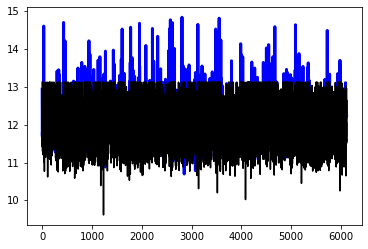

In [19]:
T=list(range(0,len(Ypred)))
T=np.array(T)
T
plt.plot(T, log_Ypred, color='blue', linewidth=3)
plt.plot(T, np.log(Ytest), color='black')

plt.show()

# Random forest for classification

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

### Data normalization from sklearn import metrics

In [21]:
housing_rtf = data.iloc[:,[0,1,2,7,9,10,11,12]]
num_features = ["longitude","latitude","housing_median_age","median_income","rooms_per_household", "bedrooms_per_household","population_per_household"]
num_transformer = Pipeline([('imputer', SimpleImputer(strategy="median")),('scaler', StandardScaler())])

cat_features = ["ocean_proximity"]
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([("num", num_transformer, num_features),("cat", cat_transformer, cat_features)])
housing_rtf = preprocessor.fit_transform(housing_rtf)
Y = data.iloc[:,13].to_numpy()
Y = Y.reshape((-1,1))


housing_rtf_final = pd.DataFrame(np.concatenate((housing_rtf,Y),axis=1))



### Split data

In [22]:
random.seed(10)
train_set, test_set = train_test_split(housing_rtf_final, test_size=0.3, random_state=12)
Ytrain = train_set.iloc[:,12]
Ytest =test_set.iloc[:,12]
Xtrain = train_set.iloc[:,0:12]
Xtest = test_set.iloc[:,0:12]

In [23]:
#Create a Gaussian Classifier
rf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(Xtrain,Ytrain)

Ypred=rf.predict(Xtest)



### Evaluation Metrics

Accuracy: 0.8937338501291989


/home/tri083/Dropbox/TEACHING/MA3832/SP2_2022/Practicals/Code/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


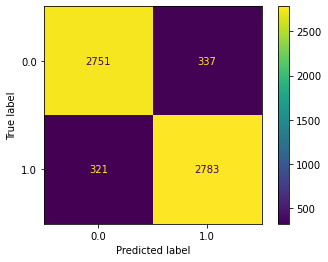

In [24]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))

confusion_matrix = metrics.confusion_matrix(Ytest,Ypred)


# Plotting confusion matrix

plot_confusion_matrix(rf, Xtest, Ytest)